In [1]:
from sqlalchemy import create_engine

import geopandas as gpd
import matplotlib.pyplot as plt

import rasterio

from rasterio.plot import show

In [2]:
url="postgresql://postgres:1@localhost:5432/college"

connect=create_engine(url)

In [3]:
sql="select * from  academy"

df_postgis=gpd.GeoDataFrame.from_postgis(sql,connect)

In [4]:
df_postgis

id                                               geom  capacity  \
0   8  MULTIPOLYGON (((29.91999 40.82211, 29.92033 40...       300   
1   5  MULTIPOLYGON (((29.92443 40.82205, 29.92446 40...       300   
2   3  MULTIPOLYGON (((29.92311 40.82326, 29.92325 40...       350   
3   6  MULTIPOLYGON (((29.92581 40.82245, 29.92603 40...       250   
4   7  MULTIPOLYGON (((29.92578 40.82179, 29.92593 40...       250   
5   2  MULTIPOLYGON (((29.92037 40.82118, 29.92047 40...       270   
6   4  MULTIPOLYGON (((29.92375 40.82268, 29.92365 40...       270   
7   1  MULTIPOLYGON (((29.92346 40.82232, 29.92306 40...       550   

            college_name  
0    Teknoloji Fakültesi  
1       Eğitim Fakültesi  
2     İletişim Fakültesi  
3         Fen Edebiyat B  
4        Hukuk Fakültesi  
5         Fen Edebiyat A  
6      İktisad Fakültesi  
7  Mühendislik Fakültesi

<AxesSubplot:>

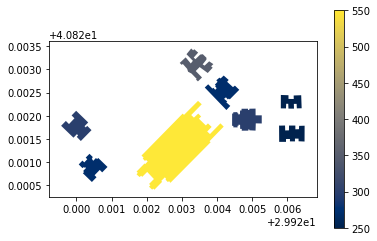

In [5]:
df_postgis.plot("capacity",legend=True,cmap="cividis")

In [6]:
df_postgis.explore("capacity",legend=True,cmap="cividis")

In [7]:
src=rasterio.open("/home/ozan/Desktop/Qgis/kou_modified.tif")
extent=[src.bounds[0],src.bounds[1],src.bounds[2],src.bounds[3]]

In [8]:
extent

[29.919304003575178, 40.82008146058487, 29.926743986919966, 40.82356809484608]

<AxesSubplot:title={'center':'Kocaeli Üniversitesi'}, xlabel='medium.com/@uzunozan41', ylabel='Geopandas I (Postgis-Sql)'>

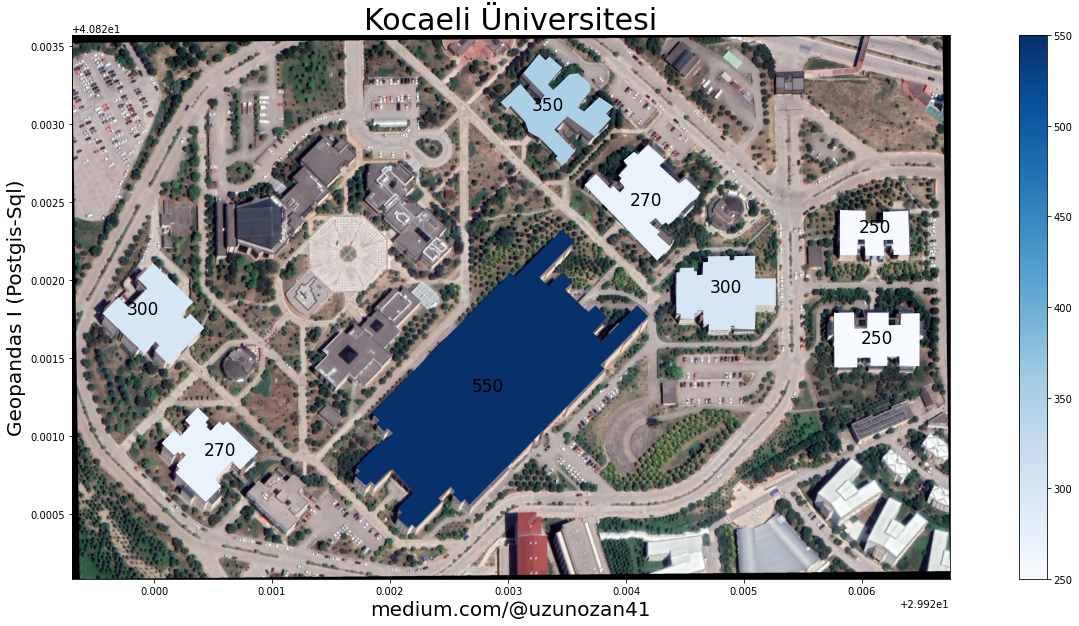

In [9]:
fig,ax=plt.subplots(figsize=(25,10))

sql="select * from  academy"

df_postgis=gpd.GeoDataFrame.from_postgis(sql,connect)

#başlık ve etiketlerin eklenmesi
ax.set_title("Kocaeli Üniversitesi",size=30)
ax.set_xlabel("medium.com/@uzunozan41",size=20)
ax.set_ylabel("Geopandas I (Postgis-Sql)",size=20)


#merkez koordinatları kolona ekliyoruz.
df_postgis["label_xy"]=df_postgis["geom"].apply(lambda x:x.representative_point().coords[0])

#Tüm kapasitelere göre etiketliyoruz.
for i,row in df_postgis.iterrows():
    
    ax.annotate(text=row["capacity"],xy=row["label_xy"],
                 horizontalalignment="center",color="black",size=17)
    
#Daha önceden tanımladığımız raster değişkeni ve koordinatlarına göre eksene rasterımızı ekliyoruz.
ax=rasterio.plot.show(src,extent=extent,ax=ax)

df_postgis.plot("capacity",ax=ax,legend=True,cmap="Blues")


In [10]:
df_postgis

id                                               geom  capacity  \
0   8  MULTIPOLYGON (((29.91999 40.82211, 29.92033 40...       300   
1   5  MULTIPOLYGON (((29.92443 40.82205, 29.92446 40...       300   
2   3  MULTIPOLYGON (((29.92311 40.82326, 29.92325 40...       350   
3   6  MULTIPOLYGON (((29.92581 40.82245, 29.92603 40...       250   
4   7  MULTIPOLYGON (((29.92578 40.82179, 29.92593 40...       250   
5   2  MULTIPOLYGON (((29.92037 40.82118, 29.92047 40...       270   
6   4  MULTIPOLYGON (((29.92375 40.82268, 29.92365 40...       270   
7   1  MULTIPOLYGON (((29.92346 40.82232, 29.92306 40...       550   

            college_name                                  label_xy  
0    Teknoloji Fakültesi   (29.919902050117273, 40.82177865416209)  
1       Eğitim Fakültesi  (29.924848564186043, 40.821922343893334)  
2     İletişim Fakültesi   (29.923341914234435, 40.82308698676701)  
3         Fen Edebiyat B   (29.926105769566377, 40.82230892416081)  
4        Hukuk Fakültesi    (29.92612650036898, 40.82159548752557)  
5         Fen Edebiyat A   (29.920560483597498, 40.82087692972131)  
6      İktisad Fakültesi   (29.924169105559166, 40.82247746422532)  
7  Mühendislik Fakültesi   (29.922832062360133, 40.82128660361505)

<AxesSubplot:title={'center':'Kocaeli Üniversitesi'}, xlabel='medium.com/@uzunozan41', ylabel='Geopandas I (Postgis-Sql)'>

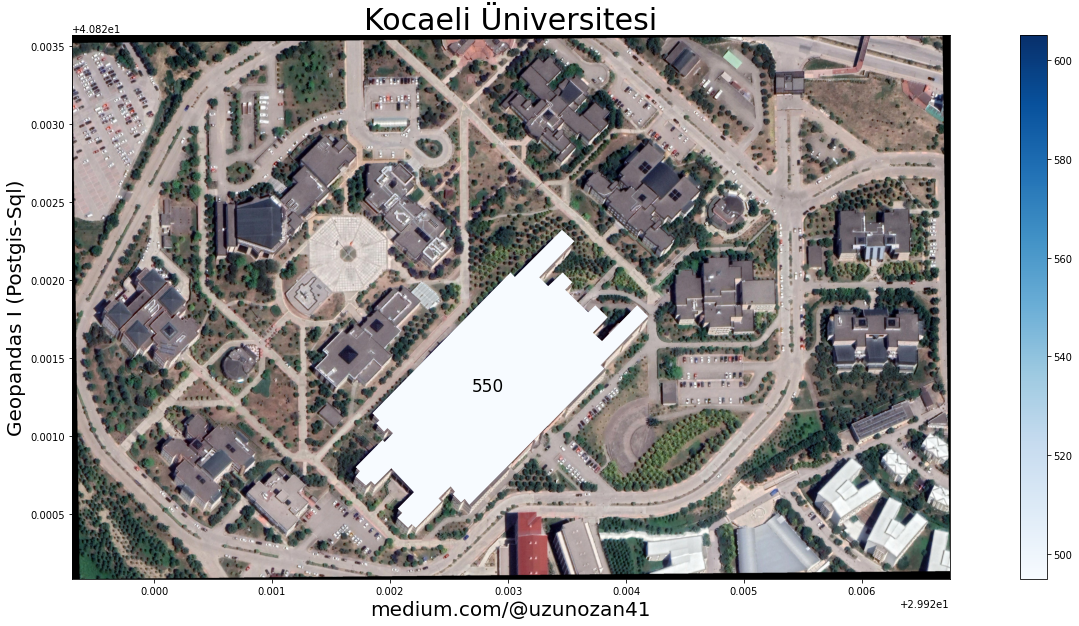

In [11]:
fig,ax=plt.subplots(figsize=(25,10))

sql="""select * from academy
       where id=1"""

df_postgis=gpd.GeoDataFrame.from_postgis(sql,connect)

#başlık ve etiketlerin eklenmesi
ax.set_title("Kocaeli Üniversitesi",size=30)
ax.set_xlabel("medium.com/@uzunozan41",size=20)
ax.set_ylabel("Geopandas I (Postgis-Sql)",size=20)


#merkez koordinatları kolona ekliyoruz.
df_postgis["label_xy"]=df_postgis["geom"].apply(lambda x:x.representative_point().coords[0])

#Tüm kapasitelere göre etiketliyoruz.
for i,row in df_postgis.iterrows():
    
    ax.annotate(text=row["capacity"],xy=row["label_xy"],
                 horizontalalignment="center",color="black",size=17)
    
#Daha önceden tanımladığımız raster değişkeni ve koordinatlarına göre eksene rasterımızı ekliyoruz.
ax=rasterio.plot.show(src,extent=extent,ax=ax)

df_postgis.plot("capacity",ax=ax,legend=True,cmap="Blues")


<AxesSubplot:title={'center':'Kocaeli Üniversitesi'}, xlabel='medium.com/@uzunozan41', ylabel='Geopandas I (Postgis-Sql)'>

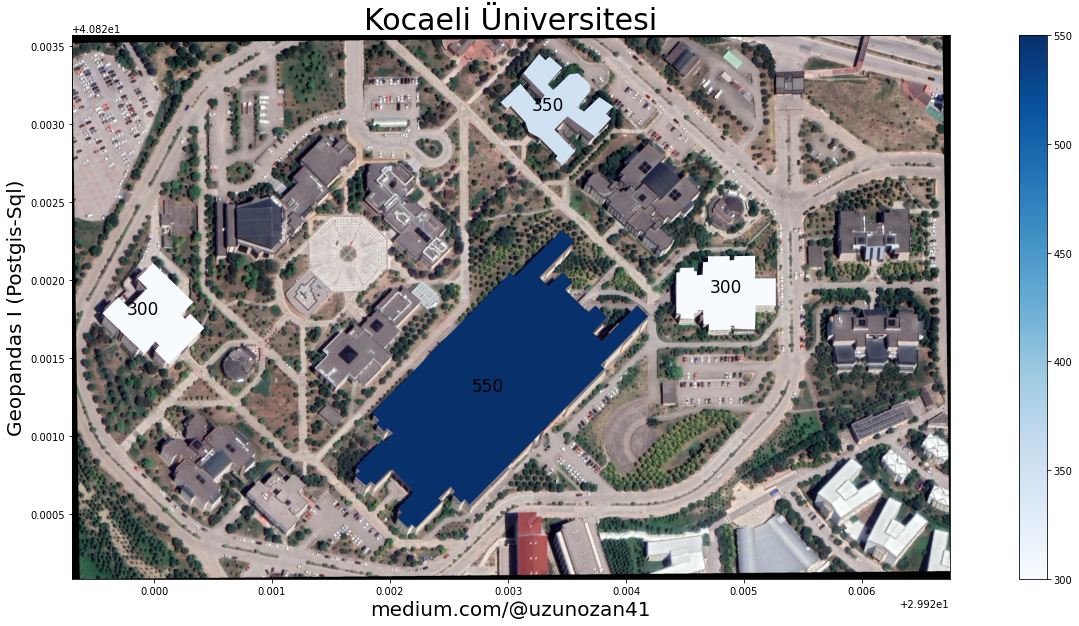

In [12]:
fig,ax=plt.subplots(figsize=(25,10))

sql="""select * from academy
       where capacity >=300"""

df_postgis=gpd.GeoDataFrame.from_postgis(sql,connect)

#başlık ve etiketlerin eklenmesi
ax.set_title("Kocaeli Üniversitesi",size=30)
ax.set_xlabel("medium.com/@uzunozan41",size=20)
ax.set_ylabel("Geopandas I (Postgis-Sql)",size=20)


#merkez koordinatları kolona ekliyoruz.
df_postgis["label_xy"]=df_postgis["geom"].apply(lambda x:x.representative_point().coords[0])

#Tüm kapasitelere göre etiketliyoruz.
for i,row in df_postgis.iterrows():
    
    ax.annotate(text=row["capacity"],xy=row["label_xy"],
                 horizontalalignment="center",color="black",size=17)
    
#Daha önceden tanımladığımız raster değişkeni ve koordinatlarına göre eksene rasterımızı ekliyoruz.
ax=rasterio.plot.show(src,extent=extent,ax=ax)

df_postgis.plot("capacity",ax=ax,legend=True,cmap="Blues")

<AxesSubplot:title={'center':'Kocaeli Üniversitesi'}, xlabel='medium.com/@uzunozan41', ylabel='Geopandas I (Postgis-Sql)'>

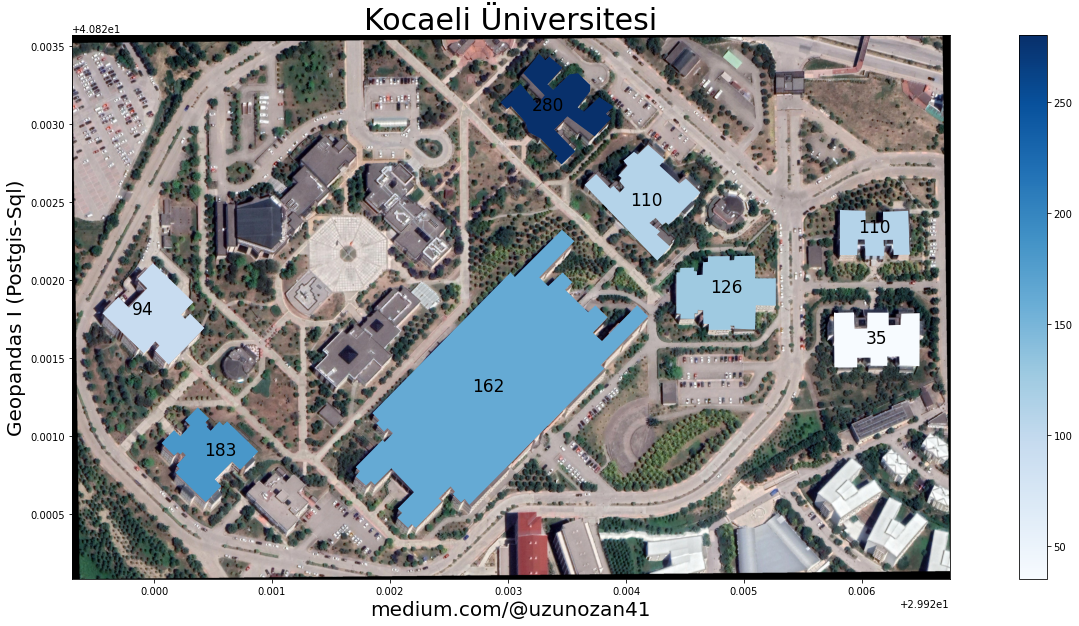

In [13]:
fig,ax=plt.subplots(figsize=(25,10))

sql="""select a.id,count(a.id) total_member,a.geom  from academy a
       left join "member" m 
       on m.college_id =a.id
       group by a.id """

df_postgis=gpd.GeoDataFrame.from_postgis(sql,connect)

#başlık ve etiketlerin eklenmesi
ax.set_title("Kocaeli Üniversitesi",size=30)
ax.set_xlabel("medium.com/@uzunozan41",size=20)
ax.set_ylabel("Geopandas I (Postgis-Sql)",size=20)


#merkez koordinatları kolona ekliyoruz.
df_postgis["label_xy"]=df_postgis["geom"].apply(lambda x:x.representative_point().coords[0])

#Tüm kapasitelere göre etiketliyoruz.
for i,row in df_postgis.iterrows():
    
    ax.annotate(text=row["total_member"],xy=row["label_xy"],
                 horizontalalignment="center",color="black",size=17)
    
#Daha önceden tanımladığımız raster değişkeni ve koordinatlarına göre eksene rasterımızı ekliyoruz.
ax=rasterio.plot.show(src,extent=extent,ax=ax)

df_postgis.plot("total_member",ax=ax,legend=True,cmap="Blues")

<AxesSubplot:title={'center':'Kocaeli Üniversitesi'}, xlabel='medium.com/@uzunozan41', ylabel='Geopandas I (Postgis-Sql)'>

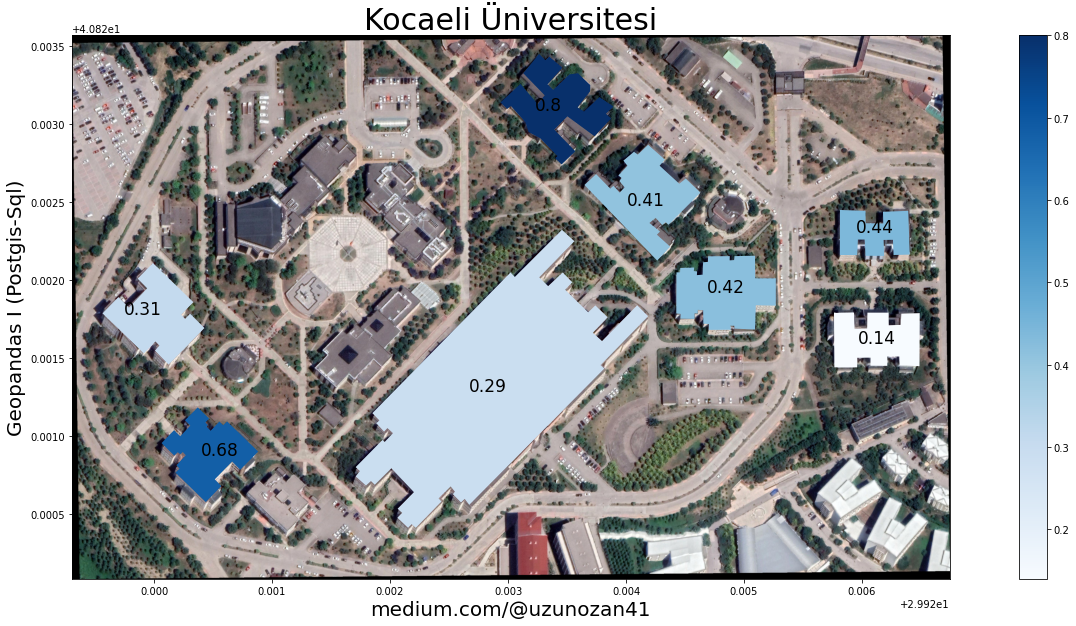

In [14]:
fig,ax=plt.subplots(figsize=(25,10))

sql="""select
    a.id,
    round(count(a.id)/capacity::numeric,2) rate , 
    a.geom
    from academy a
    left join "member" m 
    on m.college_id = a.id
    group by  a.id """

df_postgis=gpd.GeoDataFrame.from_postgis(sql,connect)

#başlık ve etiketlerin eklenmesi
ax.set_title("Kocaeli Üniversitesi",size=30)
ax.set_xlabel("medium.com/@uzunozan41",size=20)
ax.set_ylabel("Geopandas I (Postgis-Sql)",size=20)


#merkez koordinatları kolona ekliyoruz.
df_postgis["label_xy"]=df_postgis["geom"].apply(lambda x:x.representative_point().coords[0])

#Tüm kapasitelere göre etiketliyoruz.
for i,row in df_postgis.iterrows():
    
    ax.annotate(text=row["rate"],xy=row["label_xy"],
                 horizontalalignment="center",color="black",size=17)
    
#Daha önceden tanımladığımız raster değişkeni ve koordinatlarına göre eksene rasterımızı ekliyoruz.
ax=rasterio.plot.show(src,extent=extent,ax=ax)

df_postgis.plot("rate",ax=ax,legend=True,cmap="Blues")

<AxesSubplot:title={'center':'Kocaeli Üniversitesi'}, xlabel='medium.com/@uzunozan41', ylabel='Geopandas I (Postgis-Sql)'>

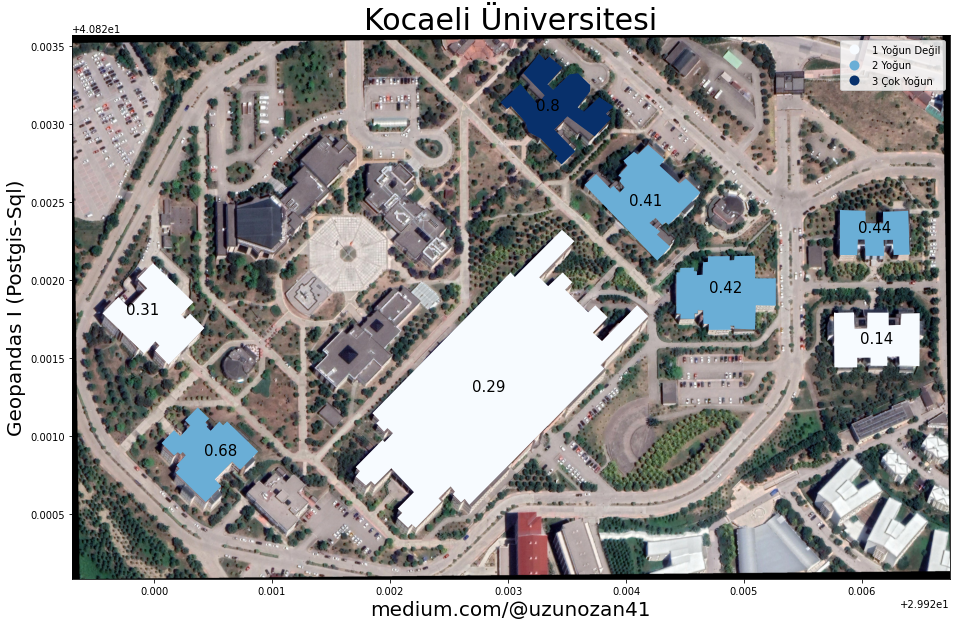

In [15]:
fig,ax=plt.subplots(figsize=(25,10))

sql="""select
    a.id,
    round(count(a.id)/capacity::numeric,2) rate ,
    case 
        when count(a.id)/capacity::numeric<0.35 then '1 Yoğun Değil'
        when 0.35<=count(a.id)/capacity::numeric and count(a.id)/capacity::numeric<0.70 then '2 Yoğun'
        when 0.70<=count(a.id)/capacity::numeric then '3 Çok Yoğun'
    end status,
    a.geom
    from academy a
    left join "member" m 
    on m.college_id = a.id
    group by  a.id """

df_postgis=gpd.GeoDataFrame.from_postgis(sql,connect)

#başlık ve etiketlerin eklenmesi
ax.set_title("Kocaeli Üniversitesi",size=30)
ax.set_xlabel("medium.com/@uzunozan41",size=20)
ax.set_ylabel("Geopandas I (Postgis-Sql)",size=20)


#merkez koordinatları kolona ekliyoruz.
df_postgis["label_xy"]=df_postgis["geom"].apply(lambda x:x.representative_point().coords[0])

#Tüm kapasitelere göre etiketliyoruz.
for i,row in df_postgis.iterrows():
    
    ax.annotate(text=row["rate"],xy=row["label_xy"],
                 horizontalalignment="center",color="black",size=15)
    
#Daha önceden tanımladığımız raster değişkeni ve koordinatlarına göre eksene rasterımızı ekliyoruz.
ax=rasterio.plot.show(src,extent=extent,ax=ax)

df_postgis.plot("status",ax=ax,legend=True,cmap="Blues")

In [17]:
import session_info

session_info.show()